In [125]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [126]:
df=pd.read_csv("fraud.csv")

In [3]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


<AxesSubplot:>

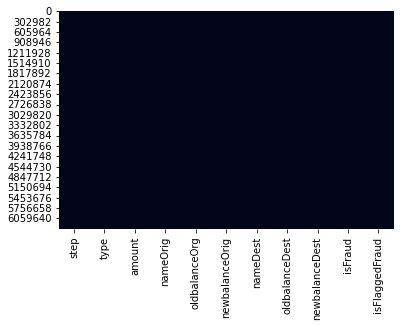

In [6]:
sns.heatmap(df.isnull(), cbar=False)


In [7]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

From the graph, it can be seen that there are no null values. 

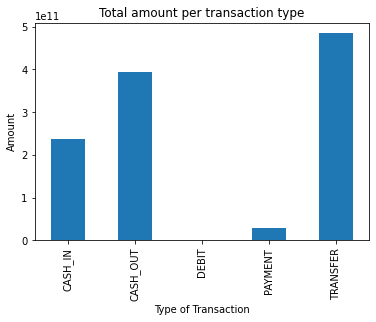

In [11]:
var = df.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')

ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

In [9]:
#the above graph shows the modes which are most used

In [7]:
df.loc[df.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [155]:
#The above output shows that all the frauds happens in the transfer and cash_out transactions.

In [37]:
#Now, we shall test the effectiveness of the system 

In [8]:
fraud=df.loc[df.isFraud==1]
nonfraud=df.loc[df.isFraud==0]

In [9]:
print("Total number of fraud that took place:",(fraud.isFraud.count()))
print("Total number of fraud that did not take place:",(nonfraud.isFraud.count()))
print("Total number of fraud that system was able to identify:",(df.isFlaggedFraud.sum()))

Total number of fraud that took place: 8213
Total number of fraud that did not take place: 6354407
Total number of fraud that system was able to identify: 16


In [95]:
print("Sum of the amount in the fraud transcations: rupees", (fraud.amount.sum()))

Sum of the amount in the fraud transcations: rupees 12056415427.839998


In [36]:
on = pd.get_dummies(df.isFraud)

In [37]:
on.head()

,0,1
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [41]:
on.sum()

0    6354407
1       8213
dtype: int64

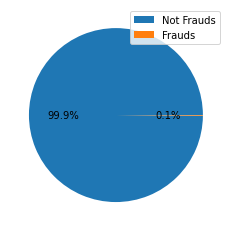

In [62]:
plt.pie(on.sum(),autopct='%1.1f%%')
plt.legend(loc='upper right',labels=['Not Frauds','Frauds'])

In [49]:
#As we can see majority of the transactions are not fraud 

In [50]:
data=[fraud.isFraud.count(),df.isFlaggedFraud.sum()]

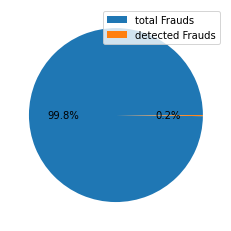

In [61]:
plt.pie(data,autopct='%1.1f%%')
plt.legend(loc='upper right', labels=["total Frauds","detected Frauds"])

In [63]:
#As we can see only 0.2% of the frauds were able to be detected which is very low 

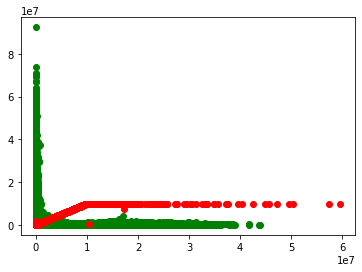

In [106]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')



plt.show()

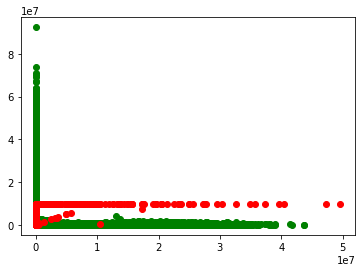

In [107]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['newbalanceOrig'],nonfraud['amount'],c='g')
ax.scatter(fraud['newbalanceOrig'],fraud['amount'],c='r')
plt.show()


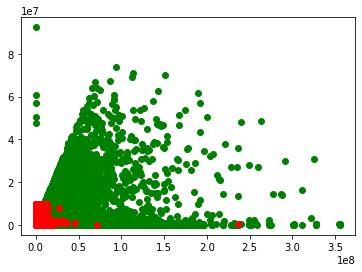

In [98]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceDest'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceDest'],fraud['amount'],c='r')
plt.show()

In [156]:
#most of the fraud are happenning from 0 to 1 crore

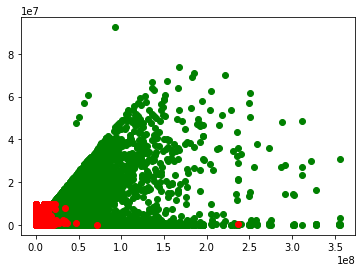

In [103]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['newbalanceDest'],nonfraud['amount'],c='g')
ax.scatter(fraud['newbalanceDest'],fraud['amount'],c='r')
plt.show()

from the graphs we could figure out that most of the frauds are happening up to 1 crore and therefore we can increase the threeshold for 
we can increase the efficeny of the graph isFlaggedfraud

In [108]:
df = df.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,
                                            'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

In [110]:
df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [112]:
X = df.drop(['isFraud'],axis=1)
y = df[['isFraud']]

In [113]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

In [114]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

if True:
    probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)
    
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(test_y,probabilities))

0.768584323786009


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceDest'>

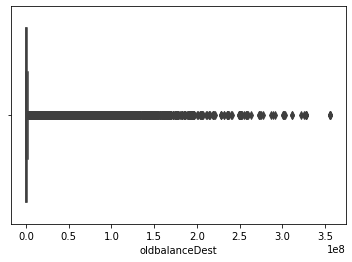

In [116]:
sns.boxplot(df['oldbalanceDest'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newbalanceDest'>

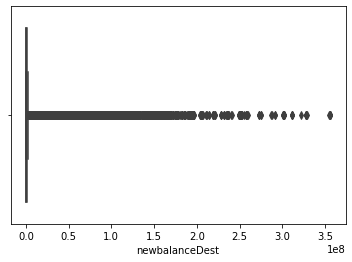

In [118]:
sns.boxplot(df['newbalanceDest'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceOrg'>

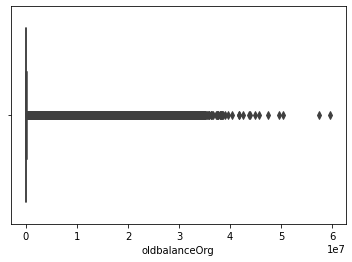

In [119]:
sns.boxplot(df['oldbalanceOrg'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newbalanceOrig'>

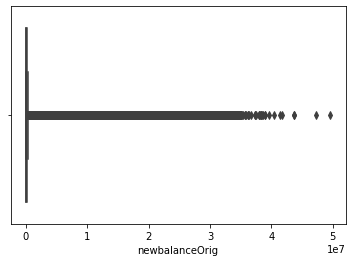

In [122]:
sns.boxplot(df['newbalanceOrig'])

In [140]:
#Removing outliers
new_df = df[(df['newbalanceOrig'] < 40000000) & (df['oldbalanceOrg'] < 40000000) & (df['newbalanceDest'] < 200000000) & (df['oldbalanceDest'] < 220000000)]

In [141]:
new_df = new_df.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,
                                            'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

new_df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

X = new_df.drop(['isFraud'],axis=1)
y = new_df[['isFraud']]

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

if True:
    probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)
    
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(test_y,probabilities))

0.778588809108321
